In [35]:
!pwd

/Users/amierzuhri/code/JplepeckiBR/PCA/notebooks


In [36]:
from PIL import Image
import numpy as np


background = Image.open("../raw_data/facial_segmentation/image/0020_0001.jpg")

In [37]:
foreground = Image.open("../raw_data/facial_segmentation/mask/0020_0001.png")

In [38]:
R = np.array(background)[:,:,0]

In [39]:
G = np.array(background)[:,:,1]

In [40]:
B = np.array(background)[:,:,2]

In [41]:
RGB = np.dstack(((R*np.array(foreground)),(G*np.array(foreground)) ,(B*np.array(foreground))))
RGB.shape

(852, 1280, 3)

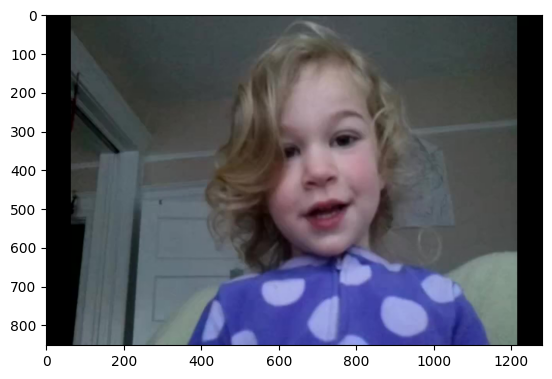

In [42]:
import matplotlib.pyplot as plt
plt.imshow(np.array(background))

In [43]:
set(np.array(foreground).flatten())

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9),
 np.uint8(10),
 np.uint8(13)}

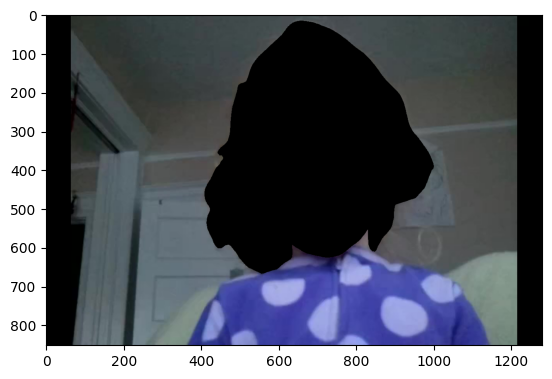

In [44]:
everything_but_the_face = np.dstack((R*(np.array(foreground)==0),G*(np.array(foreground)==0) ,B*(np.array(foreground)==0)))
plt.imshow(everything_but_the_face )

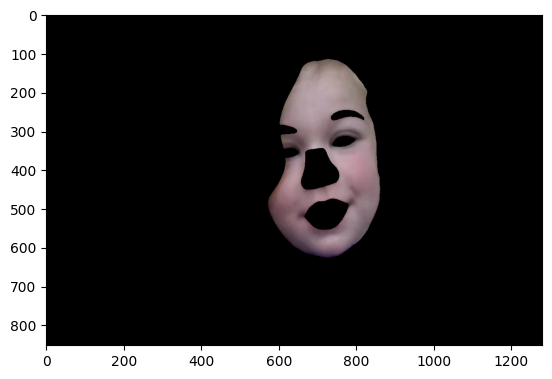

In [45]:
skin = np.dstack((R*(np.array(foreground)==1),G*(np.array(foreground)==1) ,B*(np.array(foreground)==1)))
plt.imshow(skin)

In [46]:
right_brow = np.dstack((R*(np.array(foreground) ==2),G*(np.array(foreground) ==2) ,B*(np.array(foreground)==2)))

In [47]:
left_brow = np.dstack((R*(np.array(foreground)==3),G*(np.array(foreground)==3) ,B*(np.array(foreground)==3)))

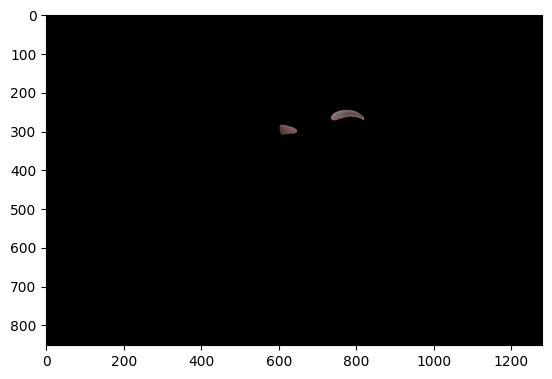

In [48]:
brows = right_brow + left_brow
plt.imshow(brows)

In [49]:
right_eye = np.dstack((R*(np.array(foreground)==4),G*(np.array(foreground)==4) ,B*(np.array(foreground)==4)))


In [50]:
left_eye = np.dstack((R*(np.array(foreground)==5),G*(np.array(foreground)==5) ,B*(np.array(foreground)==5)))

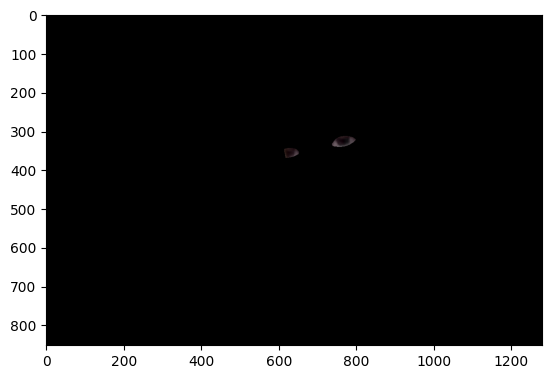

In [51]:
eyes = left_eye + right_eye
plt.imshow(eyes)

In [52]:
lowerlip = np.dstack((R*(np.array(foreground)==7),G*(np.array(foreground)==7) ,B*(np.array(foreground)==7)))


In [53]:
upperlip = np.dstack((R*(np.array(foreground)==9),G*(np.array(foreground)==9) ,B*(np.array(foreground)==9)))


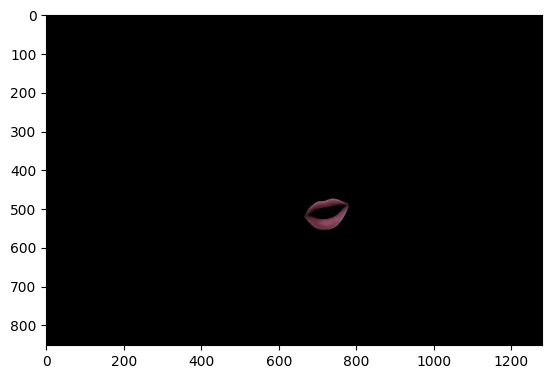

In [54]:
lips = upperlip + lowerlip
plt.imshow(lips)

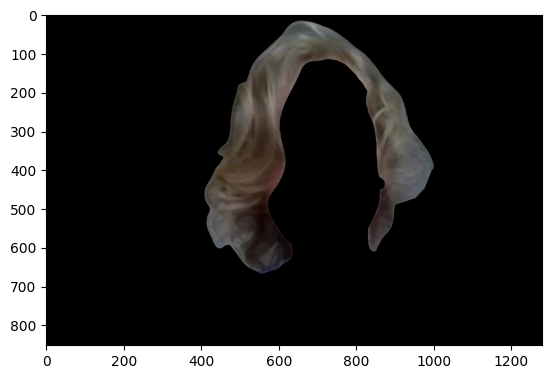

In [55]:
hair = np.dstack((R*(np.array(foreground)==10),G*(np.array(foreground)==10) ,B*(np.array(foreground)==10)))
plt.imshow(hair)

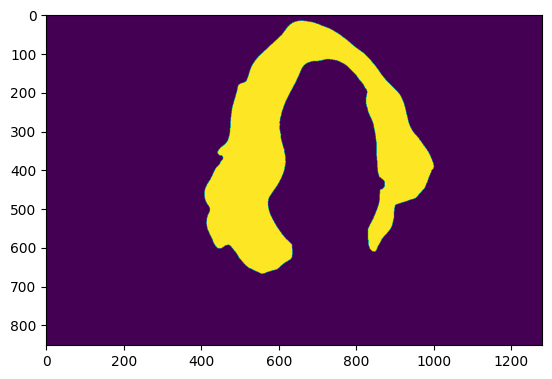

In [56]:
plt.imshow(np.array(foreground)==10)

In [57]:
type(hair)

numpy.ndarray

In [58]:
#face_features = [skin, hair, brows, lips ]


In [59]:
## Flatten the segment to (num_pixels, 3) where 3 represents the RGB channels
#flat_segment = hair.reshape(-1,3)


In [60]:
## Filter out zero pixels (background) by checking where any of the channels is non-zero
#non_zero_pixels = flat_segment[np.any(flat_segment != 0, axis=1)]

In [61]:
## Calculate the mean for each channel
#mean_red = np.mean(non_zero_pixels[:, 0])
#mean_green = np.mean(non_zero_pixels[:, 1])
#mean_blue = np.mean(non_zero_pixels[:, 2])

In [62]:
#mean_red

In [63]:
def average_color(segment):
    """
    Calculate the average color of a segment ignoring zero values.

    Args:
    segment (numpy.ndarray): A 3D array (height, width, channels) representing the RGB values of a segment.

    Returns:
    tuple: A tuple representing the average (R, G, B) values of the segment.
    """
    # Flatten the segment to (num_pixels, 3) where 3 represents the RGB channels
    flat_segment = segment.reshape(-1, 3)

    # Filter out zero pixels (background) by checking where any of the channels is non-zero
    non_zero_pixels = flat_segment[np.any(flat_segment != 0, axis=1)]

    if non_zero_pixels.size == 0:
        # If no non-zero pixels are found, return a tuple with zeros (or any default value)
        return (0, 0, 0)

    # Calculate the mean for each channel
    mean_red = np.mean(non_zero_pixels[:, 0])
    mean_green = np.mean(non_zero_pixels[:, 1])
    mean_blue = np.mean(non_zero_pixels[:, 2])

    return (mean_red, mean_green, mean_blue)


In [64]:
# Calculate the average color for each segment
average_skin_color = average_color(skin)
average_brows_color = average_color(brows)
average_eyes_color = average_color(eyes)
average_lips_color = average_color(lips)
average_hair_color = average_color(hair)

In [65]:
average_skin_color

(np.float64(144.63991733739394),
 np.float64(120.24273439199477),
 np.float64(125.89672612573418))

In [66]:
import matplotlib.pyplot as plt
import numpy as np


In [67]:
def visualize_color(color, title):
    """
    Visualize a solid color image.

    Args:
    color (tuple): A tuple representing the RGB color (R, G, B).
    title (str): Title of the plot.
    """
    # Create a solid color image of size 100x100
    image = np.ones((100, 100, 3))
    image[:, :, 0] *= color[0] / 255.0
    image[:, :, 1] *= color[1] / 255.0
    image[:, :, 2] *= color[2] / 255.0

    # Plot the image
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


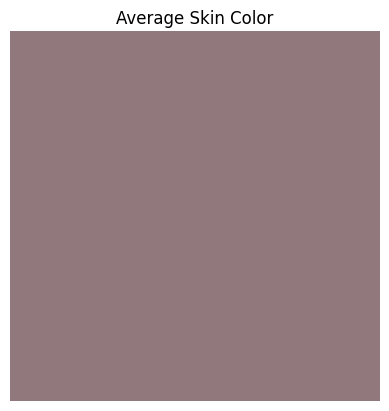

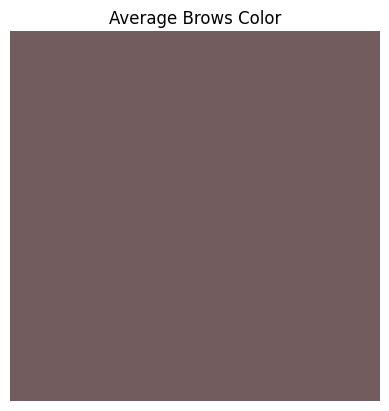

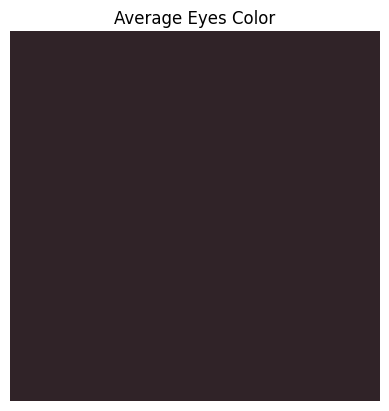

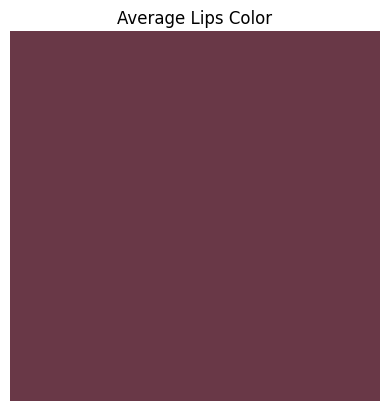

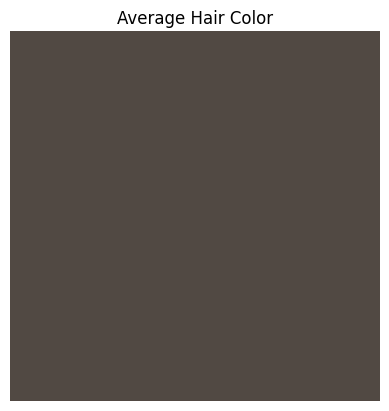

In [68]:
# Visualize colors
visualize_color(average_skin_color, 'Average Skin Color')
visualize_color(average_brows_color, 'Average Brows Color')
visualize_color(average_eyes_color, 'Average Eyes Color')
visualize_color(average_lips_color, 'Average Lips Color')
visualize_color(average_hair_color, 'Average Hair Color')